# Netflix Show Clustering Using K-Means
## Project Objective

**The goal of this project is to group similar Netflix shows and movies based on their genre, rating, and duration using the K-Means clustering algorithm. This helps in understanding content patterns, improving recommendation systems, and analyzing Netflix’s catalog structure.**


## Problem Statement

**Netflix has a large volume of content with varying genres, maturity ratings, and durations. Manually categorizing similar shows is inefficient. By applying unsupervised machine learning, we can automatically cluster similar content without predefined labels.**

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

## Step 2: Load the Dataset

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Step 3: Select Required Columns

In [3]:
df = df[['type', 'listed_in', 'rating', 'duration']]
df.head()

,type,listed_in,rating,duration
0,Movie,Documentaries,PG-13,90 min
1,TV Show,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,2 Seasons
2,TV Show,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,1 Season
3,TV Show,"Docuseries, Reality TV",TV-MA,1 Season
4,TV Show,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,2 Seasons


##  Step 4: Handle Missing Values

In [4]:
df.isnull().sum()

type         0
listed_in    0
rating       4
duration     3
dtype: int64

In [7]:
#Fill missing values safely.
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('0 min', inplace=True)
df['listed_in'].fillna('Unknown', inplace=True)

C:\Users\range\AppData\Local\Temp\ipykernel_6360\3860136681.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['listed_in'].fillna('Unknown', inplace=True)


In [6]:
df.isnull().sum()

type         0
listed_in    0
rating       0
duration     0
dtype: int64

## Step 5: Convert Duration to Numerical Format

In [8]:
#Movies have minutes, TV Shows have seasons.
def convert_duration(value):
    try:
        return int(value.split()[0])
    except:
        return 0

df['duration_num'] = df['duration'].apply(convert_duration)

## Step 6: Encode Categorical Columns

In [9]:
le_type = LabelEncoder()
le_genre = LabelEncoder()
le_rating = LabelEncoder()

df['type_encoded'] = le_type.fit_transform(df['type'])
df['genre_encoded'] = le_genre.fit_transform(df['listed_in'])
df['rating_encoded'] = le_rating.fit_transform(df['rating'])

## Step 7: Prepare Feature Set

In [11]:
features = df[['type_encoded', 'genre_encoded', 'rating_encoded', 'duration_num']]
features.head()

,type_encoded,genre_encoded,rating_encoded,duration_num
0,0,274,7,90
1,1,414,11,2
2,1,242,11,1
3,1,297,11,1
4,1,393,11,2


## Step 8: Scale the Data

In [12]:
#Scaling is mandatory for K-Means.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Step 9: Find Optimal K Using Elbow Method

In [13]:
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

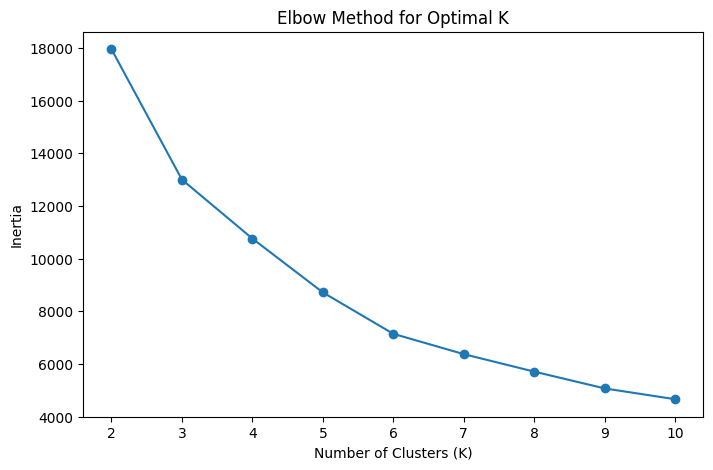

In [15]:
#Plot the elbow curve.
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


## Step 10: Apply K-Means Clustering

In [17]:
# Choose K = 5 (you can change based on elbow).
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

## Step 11: Analyze Cluster Distribution

In [18]:
df['Cluster'].value_counts()

Cluster
0    2722
2    2223
1    1605
4    1186
3    1071
Name: count, dtype: int64

## Step 12: Visualize Clusters

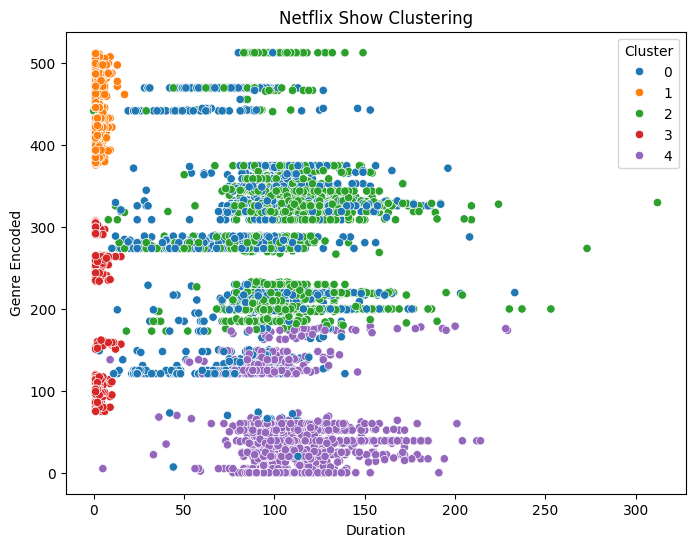

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['duration_num'],
    y=df['genre_encoded'],
    hue=df['Cluster'],
    palette='tab10'
)
plt.xlabel("Duration")
plt.ylabel("Genre Encoded")
plt.title("Netflix Show Clustering")
plt.show()

## Step 13: View Clustered Data

In [20]:
df[['type', 'listed_in', 'rating', 'duration', 'Cluster']].head(10)

,type,listed_in,rating,duration,Cluster
0,Movie,Documentaries,PG-13,90 min,2
1,TV Show,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,2 Seasons,1
2,TV Show,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,1 Season,3
3,TV Show,"Docuseries, Reality TV",TV-MA,1 Season,3
4,TV Show,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,2 Seasons,1
5,TV Show,"TV Dramas, TV Horror, TV Mysteries",TV-MA,1 Season,1
6,Movie,Children & Family Movies,PG,91 min,4
7,Movie,"Dramas, Independent Movies, International Movies",TV-MA,125 min,0
8,TV Show,"British TV Shows, Reality TV",TV-14,9 Seasons,3
9,Movie,"Comedies, Dramas",PG-13,104 min,2


## Step 14: Save the Clustered Dataset (Optional)

In [21]:
df.to_csv("netflix_clustered_output.csv", index=False)

# The End !!